In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, Reshape
import os
import tensorflow as tf
import ImageResize

from PIL import Image, ImageFilter
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
dataset = np.load('dataset/dataset.npz')
my_dict = {1: 'ka', 2: 'kha', 3: 'ga', 4: 'gha', 5: 'ङ', 6:'च', 7: 'छ', 8:'ज',9:'झ',10:'ञ',11:'ट',12:'ठ',13:'ड',14:'ढ',15:'ण', 16:'त',17:'थ',18:'द', 19:'ध',20:'न',21:'प',22:'फ',23:'ब',24:'भ',25:'म', 26:'य', 27:'र', 28:'ल', 29:'व', 30:'श', 31:'ष', 32:'स', 33:'ह', 34:'क्ष', 35:'त्र', 36:'ज्ञ', 37:'0', 38:'1', 39:'2', 40:'3', 41:'4', 42:'5', 43:'6', 44:'7', 45:'8', 46:'9' }


dataset contains four files
* arr_0 = train label
* arr_1 = train images
* arr_2 = test label
* arr_3 = test images

In [82]:
dataset.files

['arr_1', 'arr_0', 'arr_3', 'arr_2']

In [83]:
dataset.keys

<bound method Mapping.keys of <numpy.lib.npyio.NpzFile object at 0xb7694f9b0>>

In [3]:
label_train = dataset['arr_1']
image_train = dataset['arr_0']
label_test = dataset['arr_3']
image_test = dataset['arr_2']

image_train = tf.keras.utils.normalize(image_train, axis=1)
image_test = tf.keras.utils.normalize(image_test, axis=1)

Print the length of train image

In [22]:
len(image_train)

78200

In [23]:
len(image_test)

13800

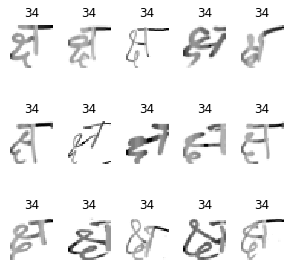

In [56]:
plt.figure(figsize=(5,5))
start_index = 2000
end_index = 2015
index = 1
for image, label in zip(image_train[start_index:end_index], label_train[start_index:end_index]):
    plt.subplot(3,5,index)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(label)
    index += 1

In [25]:
label_train

array([39, 39, 39, ..., 29, 29, 29])

In [26]:
image_train[0].shape

(32, 32)

In [27]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(47, activation='softmax'))

In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(image_train, label_train,epochs=8)

Epoch 1/8
78200/78200 [==============================] - 35s 451us/step - loss: 1.1357 - acc: 0.6859
Epoch 2/8
78200/78200 [==============================] - 23s 298us/step - loss: 0.5289 - acc: 0.8468
Epoch 3/8
78200/78200 [==============================] - 24s 304us/step - loss: 0.3752 - acc: 0.8884
Epoch 4/8
78200/78200 [==============================] - 23s 292us/step - loss: 0.2959 - acc: 0.9108
Epoch 5/8
78200/78200 [==============================] - 22s 284us/step - loss: 0.2442 - acc: 0.9251
Epoch 6/8
78200/78200 [==============================] - 24s 304us/step - loss: 0.2043 - acc: 0.9362
Epoch 7/8
78200/78200 [==============================] - 20s 255us/step - loss: 0.1797 - acc: 0.9436
Epoch 8/8
78200/78200 [==============================] - 22s 280us/step - loss: 0.1535 - acc: 0.9514


In [29]:
val_loss, val_acc = model.evaluate(image_test, label_test)
print(val_loss, val_acc)

13800/13800 [==============================] - 1s 65us/step
0.31180986786598636 0.9163768115942029


In [30]:
model.save('handwriting.model')

In [8]:
new_model = tf.keras.models.load_model('handwriting.model', compile=False)

ज


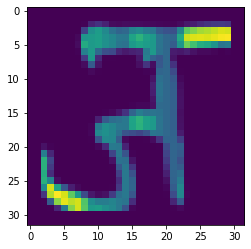

In [9]:
img = np.expand_dims(image_test[1000], axis = 0)
predictions = new_model.predict(img)
print(my_dict.get(np.argmax(predictions[0])))
plt.imshow(image_test[1000])

In [23]:
img = ImageResize.resizeImage('test_img.png')
img = np.expand_dims(img, axis = 0)
x = Image.open('test_img.png')
x.show()

In [24]:
predictions = new_model.predict(img)
predicted_class = np.argmax(predictions[0])
print(predicted_class)
print(my_dict.get(predicted_class))

23
ब


In [79]:
label_test[1700]

21

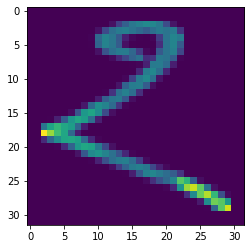

In [40]:
label_test[0]

39

In [41]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  131200    
_________________________________________________________________
dense_11 (Dense)             multiple                  16512     
_________________________________________________________________
dense_12 (Dense)             multiple                  6063      
Total params: 153,775
Trainable params: 153,775
Non-trainable params: 0
_________________________________________________________________
